# League of Legends eSports Predictor

## 1. Introduction

### Hello!

This Notebook is my personal project to predict a winner between two LoL esports teams. At first I wanted to try to predict the professional game's winner based on champion selection, only to come to a dissapointing conclusion that it is almost impossible, resulting close to a 50-50 guess.

I then decided to move my goal to simply predict games based on who's playing who and on which side of the map. I gathered all my data from [gol.gg](https://gol.gg/esports/home/) and preprocessed it. I tried a bunch of different algorithms and models, evaluated them and came to a conclusion which of them is the best. I then created a demo section to predict your own games.

The model was taught with all the regular season games from 2020 to February 2022 in *LEC*, *LCS* and *LCK* and a total amount of 1205 games. The model would most likely benefit from adding more games to reach atleast 2000 games.

The predictor uses team strenghts as an average of their whole splits and does not take into account variables such as individual players statistics, teams head-to-head records, or team's current situation (such as an ongoing win or losing streaks). For these reasons the model will also make more reliable predictions towards the end of the season. It does not know if any sudden roster swaps or other outside of the game events occur.

I managed to get a good accuracy and recall of 70% without overfitting, which is around the same what an average active watcher and some professional analysts get, based on [IWDominate's](https://www.twitch.tv/iwilldominate) and his viewers predictions.

The aim of this project was not only to predict the winners but also strenghten my own data preprocessing and machine learning skills with Python. I also made a graphical user interface with React for the final model which I will publish on Heroku.

I do not recommend to use the model for betting, but if you decided to do so let me know how you did!

## 2. Setup

In this section I import all the necessary libraries and read the data from the HTML files. I managed to read the data straight from URL only after I had done this, so for now I don't bother to change them to that. Local files for the model training might not be a bad thing, since now it can be rerun every time independently from the gol.gg website status. However the predictor uses URLs because it needs to be up to date with all the team's strenghts for real time predictions.

In [242]:
%pylab inline
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, losses, metrics, optimizers
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
import pydotplus
import graphviz
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import requests

plt.rcParams["figure.figsize"] = (20,10)
print(f'tensorflow version: {tf.__version__}')

Populating the interactive namespace from numpy and matplotlib
tensorflow version: 2.7.0


Here we gather the teams and match histories from the files. It's not pretty looking and could be divided into it's own python file, but I will leave it here to show a thorough progress of my work.

In [243]:
#-------------------------// 2022 //---------------------------------#

        # -------------- // Spring // -------------- #

                # ------ // History // ------ #

lck2022SpringHistory = pd.read_html("data/LCK2022SpringHistory.html")
lck2022SpringHistory = pd.concat(lck2022SpringHistory)

lec2022SpringHistory = pd.read_html("data/LEC2022SpringHistory.html")
lec2022SpringHistory = pd.concat(lec2022SpringHistory)

lcs2022SpringHistory = pd.read_html("data/LCS2022SpringHistory.html")
lcs2022SpringHistory = pd.concat(lcs2022SpringHistory)


                # ------ // Teams // ------ #

lck2022SpringTeams = pd.read_html("data/LCK2022SpringTeams.html")
lck2022SpringTeams = pd.concat(lck2022SpringTeams)

lec2022SpringTeams = pd.read_html("data/LEC2022SpringTeams.html")
lec2022SpringTeams = pd.concat(lec2022SpringTeams)

lcs2022SpringTeams = pd.read_html("data/LCS2022SpringTeams.html")
lcs2022SpringTeams = pd.concat(lcs2022SpringTeams)

#-------------------------// 2021 //---------------------------------#

        # -------------- // Summer // -------------- #

                # ------ // Teams // ------ #


lec2021SummerTeams = pd.read_html("data/LEC2021SummerTeams.html")
lec2021SummerTeams = pd.concat(lec2021SummerTeams)

lcs2021SummerTeams = pd.read_html("data/LCS2021SummerTeams.html")
lcs2021SummerTeams = pd.concat(lcs2021SummerTeams)

lck2021SummerTeams = pd.read_html("data/LCK2021SummerTeams.html")
lck2021SummerTeams = pd.concat(lck2021SummerTeams)

        # -------------- // History // -------------- #

lcs2021SummerHistory = pd.read_html("data/LCS2021SummerHistory.html")
lcs2021SummerHistory = pd.concat(lcs2021SummerHistory)

lec2021SummerHistory = pd.read_html("data/LEC2021SummerHistory.html")
lec2021SummerHistory = pd.concat(lec2021SummerHistory)

lck2021SummerHistory = pd.read_html("data/LCK2021SummerHistory.html")
lck2021SummerHistory = pd.concat(lck2021SummerHistory)

        # -------------- // Spring // -------------- #

                # ------ // Teams // ------ #

lec2021SpringTeams = pd.read_html("data/LEC2021SpringTeams.html")
lec2021SpringTeams = pd.concat(lec2021SpringTeams)

lcs2021SpringTeams = pd.read_html("data/LCS2021SpringTeams.html")
lcs2021SpringTeams = pd.concat(lcs2021SpringTeams)

lck2021SpringTeams = pd.read_html("data/LCK2021SpringTeams.html")
lck2021SpringTeams = pd.concat(lck2021SpringTeams)

                # ------ // History // ------ #

lec2021SpringHistory = pd.read_html("data/LEC2021SpringHistory.html")
lec2021SpringHistory = pd.concat(lec2021SpringHistory)

lcs2021SpringHistory = pd.read_html("data/LCS2021SpringHistory.html")
lcs2021SpringHistory = pd.concat(lcs2021SpringHistory)

lck2021SpringHistory = pd.read_html("data/LCK2021SpringHistory.html")
lck2021SpringHistory = pd.concat(lck2021SpringHistory)

#-------------------------// 2020 //---------------------------------#

        # -------------- // Summer // -------------- #

                # ------ // Teams // ------ #

lec2020SummerTeams = pd.read_html("data/LEC2020SummerTeams.html")
lec2020SummerTeams = pd.concat(lec2020SummerTeams)

lcs2020SummerTeams = pd.read_html("data/LCS2020SummerTeams.html")
lcs2020SummerTeams = pd.concat(lcs2020SummerTeams)

lck2020SummerTeams = pd.read_html("data/LCK2020SummerTeams.html")
lck2020SummerTeams = pd.concat(lck2020SummerTeams)

                # ------ // History // ------ #

lcs2020SummerHistory = pd.read_html("data/LCS2020SummerHistory.html")
lcs2020SummerHistory = pd.concat(lcs2020SummerHistory)

lec2020SummerHistory = pd.read_html("data/LEC2020SummerHistory.html")
lec2020SummerHistory = pd.concat(lec2020SummerHistory)

lck2020SummerHistory = pd.read_html("data/LCK2020SummerHistory.html")
lck2020SummerHistory = pd.concat(lck2020SummerHistory)

        # -------------- // Spring // -------------- #

                # ------ // Teams // ------ #

lec2020SpringTeams = pd.read_html("data/LEC2020SpringTeams.html")
lec2020SpringTeams = pd.concat(lec2020SpringTeams)

lcs2020SpringTeams = pd.read_html("data/LCS2020SpringTeams.html")
lcs2020SpringTeams = pd.concat(lcs2020SpringTeams)

lck2020SpringTeams = pd.read_html("data/LCK2020SpringTeams.html")
lck2020SpringTeams = pd.concat(lck2020SpringTeams)

                # ------ // History // ------ #

lec2020SpringHistory = pd.read_html("data/LEC2020SpringHistory.html")
lec2020SpringHistory = pd.concat(lec2020SpringHistory)

lcs2020SpringHistory = pd.read_html("data/LCS2020SpringHistory.html")
lcs2020SpringHistory = pd.concat(lcs2020SpringHistory)

lck2020SpringHistory = pd.read_html("data/LCK2020SpringHistory.html")
lck2020SpringHistory = pd.concat(lck2020SpringHistory)

lec2022SpringHistory.tail(10)

,Game,Unnamed: 1,Score,Unnamed: 3,Unnamed: 4,Patch,Date
45,VIT vs Fnatic,Team Vitality,0 - 1,Fnatic,WEEK1,12.1,2022-01-15
46,G2 Esports vs Astralis,G2 Esports,1 - 0,Astralis,WEEK1,12.1,2022-01-15
47,SK Gaming vs MAD Lions,SK Gaming,1 - 0,MAD Lions,WEEK1,12.1,2022-01-15
48,Rogue vs MSF,Rogue,1 - 0,Misfits Gaming,WEEK1,12.1,2022-01-15
49,Team BDS vs XL,Excel Esports,0 - 1,Team BDS,WEEK1,12.1,2022-01-15
50,Team BDS vs Fnatic,Fnatic,1 - 0,Team BDS,WEEK1,12.1,2022-01-14
51,MSF vs Astralis,Astralis,0 - 1,Misfits Gaming,WEEK1,12.1,2022-01-14
52,G2 Esports vs XL,Excel Esports,0 - 1,G2 Esports,WEEK1,12.1,2022-01-14
53,SK Gaming vs Rogue,Rogue,1 - 0,SK Gaming,WEEK1,12.1,2022-01-14
54,VIT vs MAD Lions,MAD Lions,1 - 0,Team Vitality,WEEK1,12.1,2022-01-14


This is what one splits match history looks like (10 games).

In [244]:
demo = lec2022SpringTeams
demo = demo.drop(columns=[0, 1])
demo = demo.dropna()
demo.head(10)

,CSM,DPM,DRA%,DRA@15,DRAPG,Deaths / game,FB%,FT%,GD@15,GDM,...,Name,Region,Season,TD@15,Towers killed,Towers lost,VWPM,WCPM,WPM,Win rate
0,31.6,1670.0,31.3,0.33,1.56,15.4,55.6,22.2,-1089.0,-264.0,...,Astralis,EUW,S12,-0.4,2.9,9.1,1.56,1.36,3.4,0.0%
1,32.1,1903.0,48.9,0.89,2.44,12.8,66.7,44.4,-60.0,-62.0,...,Excel Esports,EUW,S12,-0.2,6.9,6.6,1.49,1.39,3.6,44.4%
2,33.7,1981.0,66.3,1.00,3.11,11.7,33.3,77.8,1208.0,74.0,...,Fnatic,EUW,S12,0.6,6.9,5.6,1.20,1.44,3.4,66.7%
3,32.1,1855.0,52.4,0.67,2.56,11.6,55.6,44.4,68.0,19.0,...,G2 Esports,EUW,S12,0.2,7.0,6.2,1.27,1.60,3.4,66.7%
4,32.8,2064.0,43.7,0.22,2.11,16.1,66.7,66.7,397.0,33.0,...,MAD Lions,EUW,S12,0.1,7.1,6.0,1.33,1.46,3.3,55.6%
5,33.2,2039.0,51.3,0.89,2.22,13.6,44.4,55.6,-244.0,90.0,...,Misfits Gaming,EUW,S12,0.1,7.8,4.9,1.30,1.38,3.1,55.6%
6,32.9,2279.0,66.7,0.89,2.44,6.7,66.7,77.8,1707.0,376.0,...,Rogue,EUW,S12,0.6,9.4,2.6,1.16,1.46,3.2,100.0%
7,32.0,1785.0,47.2,0.89,2.22,15.8,44.4,22.2,-2006.0,-232.0,...,SK Gaming,EUW,S12,-0.6,3.7,8.9,1.31,1.31,3.3,22.2%
8,32.0,1712.0,44.7,0.89,2.11,14.6,55.6,44.4,-602.0,-134.0,...,Team BDS,EUW,S12,-0.3,4.8,7.7,1.45,1.25,3.3,33.3%
9,34.9,2041.0,47.6,1.11,2.11,13.2,11.1,44.4,620.0,101.0,...,Team Vitality,EUW,S12,0.0,6.8,5.8,1.20,1.46,3.1,55.6%


And this is what teams strenghts look like in one split. For each team it has the following data:

|Variable|Meaning|
|--|--|
|CSM|Creep score per minute|
|DPM|Damage per minute|
|DRA%|Percentage of dragons killed|
|DRA@15|Dragons at 15|
|Deaths / game|Deaths of all player per game| 
|FB%|First blood percentage|
|FT%|First turret percentage|
|GD@15|Gold difference @ 15|
|GDM|Gold difference per minute|
|GPM|Gold per minute|
|Game duration|Game duration|
|Games|Number of games|
|HER%|Percentage of heralds killed| 
|HERPG|Heralds per game|
|K:D|Average Kills/Deaths per game|
|Kills / game|Kills of all player per game|
|NASH%|Percentage of Barons killed|
|NASHPG|Barons per game|
|Name|Name of the team|
|Region|Region of the team|
|Season|Season| 
|TD@15|Tower differential @ 15|
|Towers killed|Towers killed per game|
|Towers lost|Towers lost per game|
|VWPM|Vision wards per minute|
|WCPM|Wards cleared per minute|
|WPM|Wards per minute|
|Win rate|Win rate of the team|

Next I will merge the match histories and the team strenghts into a one Dataframe:

In [245]:
lec2022Spring = pd.merge(lec2022SpringHistory, lec2022SpringTeams,  left_on="Unnamed: 1", right_on="Name")
lec2022Spring = pd.merge(lec2022Spring, lec2022SpringTeams, left_on="Unnamed: 3", right_on="Name")
lec2022 = lec2022Spring

lck2022Spring = pd.merge(lck2022SpringHistory, lck2022SpringTeams, left_on="Unnamed: 1", right_on="Name")
lck2022Spring = pd.merge(lck2022Spring, lck2022SpringTeams, left_on="Unnamed: 3", right_on="Name")
lck2022 = lck2022Spring

lcs2022Spring = pd.merge(lcs2022SpringHistory, lcs2022SpringTeams, left_on="Unnamed: 1", right_on="Name")
lcs2022Spring = pd.merge(lcs2022Spring, lcs2022SpringTeams, left_on="Unnamed: 3", right_on="Name")
lcs2022 = lcs2022Spring

lec2021Spring = pd.merge(lec2021SpringHistory, lec2021SpringTeams,  left_on="Unnamed: 1", right_on="Name")
lec2021Spring = pd.merge(lec2021Spring, lec2021SpringTeams, left_on="Unnamed: 3", right_on="Name")
lec2021Summer = pd.merge(lec2021SummerHistory, lec2021SummerTeams,  left_on="Unnamed: 1", right_on="Name")
lec2021Summer = pd.merge(lec2021Summer, lec2021SummerTeams, left_on="Unnamed: 3", right_on="Name")
lec2021 = pd.concat([lec2021Summer, lec2021Spring])

lck2021Spring = pd.merge(lck2021SpringHistory, lck2021SpringTeams,  left_on="Unnamed: 1", right_on="Name")
lck2021Spring = pd.merge(lck2021Spring, lck2021SpringTeams, left_on="Unnamed: 3", right_on="Name")
lck2021Summer = pd.merge(lck2021SummerHistory, lck2021SummerTeams,  left_on="Unnamed: 1", right_on="Name")
lck2021Summer = pd.merge(lck2021Summer, lck2021SummerTeams, left_on="Unnamed: 3", right_on="Name")
lck2021 = pd.concat([lck2021Summer, lck2021Spring])

lcs2021Spring = pd.merge(lcs2021SpringHistory, lcs2021SpringTeams,  left_on="Unnamed: 1", right_on="Name")
lcs2021Spring = pd.merge(lcs2021Spring, lcs2021SpringTeams, left_on="Unnamed: 3", right_on="Name")
lcs2021Summer = pd.merge(lcs2021SummerHistory, lcs2021SummerTeams,  left_on="Unnamed: 1", right_on="Name")
lcs2021Summer = pd.merge(lcs2021Summer, lcs2021SummerTeams, left_on="Unnamed: 3", right_on="Name")
lcs2021 = pd.concat([lcs2021Summer, lcs2021Spring])

# --------------------- // 2020 // ----------------------- #

lec2020Spring = pd.merge(lec2020SpringHistory, lec2020SpringTeams,  left_on="Unnamed: 1", right_on="Name")
lec2020Spring = pd.merge(lec2020Spring, lec2020SpringTeams, left_on="Unnamed: 3", right_on="Name")
lec2020Summer = pd.merge(lec2020SummerHistory, lec2020SummerTeams,  left_on="Unnamed: 1", right_on="Name")
lec2020Summer = pd.merge(lec2020Summer, lec2020SummerTeams, left_on="Unnamed: 3", right_on="Name")
lec2020 = pd.concat([lec2020Summer, lec2020Spring])

lck2020Spring = pd.merge(lck2020SpringHistory, lck2020SpringTeams,  left_on="Unnamed: 1", right_on="Name")
lck2020Spring = pd.merge(lck2020Spring, lck2020SpringTeams, left_on="Unnamed: 3", right_on="Name")
lck2020Summer = pd.merge(lck2020SummerHistory, lck2020SummerTeams,  left_on="Unnamed: 1", right_on="Name")
lck2020Summer = pd.merge(lck2020Summer, lck2020SummerTeams, left_on="Unnamed: 3", right_on="Name")
lck2020 = pd.concat([lck2020Summer, lck2020Spring])

lcs2020Spring = pd.merge(lcs2020SpringHistory, lcs2020SpringTeams,  left_on="Unnamed: 1", right_on="Name")
lcs2020Spring = pd.merge(lcs2020Spring, lcs2020SpringTeams, left_on="Unnamed: 3", right_on="Name")
lcs2020Summer = pd.merge(lcs2020SummerHistory, lcs2020SummerTeams,  left_on="Unnamed: 1", right_on="Name")
lcs2020Summer = pd.merge(lcs2020Summer, lcs2020SummerTeams, left_on="Unnamed: 3", right_on="Name")
lcs2020 = pd.concat([lcs2020Summer, lcs2020Spring])

final = pd.concat([lec2022, lck2022, lec2021, lck2021, lcs2021, lec2020, lck2020, lcs2020])
final = final[final["Score"].str[0] != '-']
final

,Game,Unnamed: 1,Score,Unnamed: 3,Unnamed: 4,Patch,Date,0_x,1_x,CSM_x,...,Name_y,Region_y,Season_y,TD@15_y,Towers killed_y,Towers lost_y,VWPM_y,WCPM_y,WPM_y,Win rate_y
1,VIT vs Fnatic,Team Vitality,0 - 1,Fnatic,WEEK1,12.1,2022-01-15,NaN,NaN,34.9,...,Fnatic,EUW,S12,0.6,6.9,5.6,1.20,1.44,3.4,66.7%
3,SK Gaming vs Fnatic,SK Gaming,0 - 1,Fnatic,WEEK1,12.1,2022-01-16,NaN,NaN,32.0,...,Fnatic,EUW,S12,0.6,6.9,5.6,1.20,1.44,3.4,66.7%
4,Rogue vs Fnatic,Rogue,1 - 0,Fnatic,WEEK3,12.2,2022-01-28,NaN,NaN,32.9,...,Fnatic,EUW,S12,0.6,6.9,5.6,1.20,1.44,3.4,66.7%
5,MAD Lions vs Fnatic,MAD Lions,0 - 1,Fnatic,WEEK4,12.2,2022-02-04,NaN,NaN,32.8,...,Fnatic,EUW,S12,0.6,6.9,5.6,1.20,1.44,3.4,66.7%
6,Fnatic vs XL,Excel Esports,1 - 0,Fnatic,WEEK4,12.2,2022-02-05,NaN,NaN,32.1,...,Fnatic,EUW,S12,0.6,6.9,5.6,1.20,1.44,3.4,66.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Team Liquid vs EG,Team Liquid,0 - 1,Evil Geniuses,WEEK8,10.5,2020-03-20,NaN,NaN,32.1,...,Evil Geniuses,NaN,S10,-0.2,6.9,5.1,1.49,1.42,3.6,57.9%
90,CLG vs EG,CLG,0 - 1,Evil Geniuses,WEEK7,10.4,2020-03-08,NaN,NaN,31.0,...,Evil Geniuses,NaN,S10,-0.2,6.9,5.1,1.49,1.42,3.6,57.9%
91,FlyQuest vs EG,FlyQuest,0 - 1,Evil Geniuses,WEEK3,10.2,2020-02-09,NaN,NaN,31.6,...,Evil Geniuses,NaN,S10,-0.2,6.9,5.1,1.49,1.42,3.6,57.9%
92,Cloud9 vs EG,Cloud9,1 - 0,Evil Geniuses,WEEK9,10.6,2020-03-28,NaN,NaN,32.9,...,Evil Geniuses,NaN,S10,-0.2,6.9,5.1,1.49,1.42,3.6,57.9%


And this is what the merged dataframe looks like. It still needs some preprocessing, which I will do in the next section.

## 3. Preprocessing

In this section I'm going to process the data into a model fittable format. I use a helper function to format the time from type <code>String</code> minutes and seconds into a <code>float</code> number seconds. I do the same kind of thing for score, formatting the <code>String</code> score results into a binary win/loss.

In [246]:
def get_sec(time_str):
    m, s = time_str.split(':')
    return float(60 * int(m) + int(s))

def formatScore(score):
    if score[0] == '0' or score == '1 - 2':
        return [0, 1]
    else:
        return [1, 0]

Next I will handle all the columns that might have inappropriate values. These are for example <code>FT%</code> and <code>FB%</code>, which gol.gg displays as "-" marks if their values are zeros. I use the <code>get_sec(time_str)</code> function to format the time and <code>formatScore(score)</code> to format the scores to a binary wins or losses. I take <code>Strings</code> out of Seasons and Win rates. Lastly I drop all the columns that are not needed in the model.

In [247]:
final["FT%_y"] = final["FT%_y"].replace('-', float(0)).astype(float)
final["FT%_x"] = final["FT%_x"].replace('-', float(0)).astype(float)

final["FB%_y"] = final["FB%_y"].replace('-', float(0)).astype(float)
final["FB%_x"] = final["FB%_x"].replace('-', float(0)).astype(float)

final["Season_y"] = final["Season_y"].apply(lambda x: str(x).replace('S', '')).astype(float)
final["Season_x"] = final["Season_x"].apply(lambda x: str(x).replace('S', '')).astype(float)

final = final.rename(columns={'Unnamed: 1': 'Team 1', 'Unnamed: 3': 'Team 2'})

final["Score"] = final["Score"].apply(lambda x: formatScore(x))

final["Win rate_x"] = final["Win rate_x"].apply(lambda x: float(x.replace("%", "")))
final["Win rate_y"] = final["Win rate_y"].apply(lambda x: float(x.replace("%", "")))

final["Game duration_x"] = final["Game duration_x"].apply(lambda x: get_sec(x))
final["Game duration_y"] = final["Game duration_y"].apply(lambda x: get_sec(x))

final = final.drop(columns=['Unnamed: 4', 'Patch', 'Date', 'Region_y', 'Region_x', '0_y', '0_x', '1_x', '1_y', 'Game', 'Team 1', 'Team 2', 'Name_y', 'Name_x'])
final

,Score,CSM_x,DPM_x,DRA%_x,DRA@15_x,DRAPG_x,Deaths / game_x,FB%_x,FT%_x,GD@15_x,...,NASH%_y,NASHPG_y,Season_y,TD@15_y,Towers killed_y,Towers lost_y,VWPM_y,WCPM_y,WPM_y,Win rate_y
1,"[0, 1]",34.9,2041.0,47.6,1.11,2.11,13.2,11.1,44.4,620.0,...,66.7,0.89,12.0,0.6,6.9,5.6,1.20,1.44,3.4,66.7
3,"[0, 1]",32.0,1785.0,47.2,0.89,2.22,15.8,44.4,22.2,-2006.0,...,66.7,0.89,12.0,0.6,6.9,5.6,1.20,1.44,3.4,66.7
4,"[1, 0]",32.9,2279.0,66.7,0.89,2.44,6.7,66.7,77.8,1707.0,...,66.7,0.89,12.0,0.6,6.9,5.6,1.20,1.44,3.4,66.7
5,"[0, 1]",32.8,2064.0,43.7,0.22,2.11,16.1,66.7,66.7,397.0,...,66.7,0.89,12.0,0.6,6.9,5.6,1.20,1.44,3.4,66.7
6,"[1, 0]",32.1,1903.0,48.9,0.89,2.44,12.8,66.7,44.4,-60.0,...,66.7,0.89,12.0,0.6,6.9,5.6,1.20,1.44,3.4,66.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,"[0, 1]",32.1,1652.0,45.1,0.72,2.00,8.6,38.9,33.3,-38.0,...,61.8,0.74,10.0,-0.2,6.9,5.1,1.49,1.42,3.6,57.9
90,"[0, 1]",31.0,1638.0,39.4,0.72,2.11,14.2,50.0,38.9,-1025.0,...,61.8,0.74,10.0,-0.2,6.9,5.1,1.49,1.42,3.6,57.9
91,"[0, 1]",31.6,1617.0,44.4,0.68,2.26,11.1,47.4,31.6,-560.0,...,61.8,0.74,10.0,-0.2,6.9,5.1,1.49,1.42,3.6,57.9
92,"[1, 0]",32.9,2050.0,81.3,1.67,3.61,7.3,61.1,94.4,2712.0,...,61.8,0.74,10.0,-0.2,6.9,5.1,1.49,1.42,3.6,57.9


And this is what the final dataframe looks like.

Next I will normalize the values since they differ from each other a lot and then split the dataset into training, testing and validation sets. I also create one dimensional label array for models that need it as such.

In [248]:
np.array(final['Score'])
resultArray = np.stack(final['Score'], axis=0)

data = final.copy()
data = data.drop("Score", axis = 1)
labels = resultArray

normalizer = layers.Normalization()
normalizer.adapt(np.array(data))

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.20, train_size=0.80, random_state=0)
train_data, validation_data, train_labels, validation_labels = train_test_split(train_data, train_labels, test_size=0.20, train_size=0.80, random_state=0)

train_percentage = (train_data.count()[0] / data.count()[0]).round(2) * 100
validation_percentage = (validation_data.count()[0] / data.count()[0]).round(2) * 100
test_percentage = (test_data.count()[0] / data.count()[0]).round(2) * 100

print (f"Training set: {train_percentage} % of the original dataset")
print (f"Validation set: {validation_percentage} % of the original dataset")
print (f"Test set: {test_percentage} % of the original dataset")

Training set: 64.0 % of the original dataset
Validation set: 16.0 % of the original dataset
Test set: 20.0 % of the original dataset


## 4. Modeling

I decided to try bunch of different models and algorithms to analyze the data. Some of them fit well and some of them worse. In this section I'm analyzing different models for this particular machine learning problem and lastly will choose the final one to use in the demo section.

### 4.1 GaussianNB

In [249]:
gaussianNB = GaussianNB()
onedLabels = final["Score"].apply(lambda x: x[0])

train_dataG, test_dataG, train_labelsG, test_labelsG = train_test_split(data, onedLabels, test_size=0.20, train_size=0.80, random_state=0, shuffle=True)

gaussianNB.fit(train_dataG, train_labelsG)
predictions = gaussianNB.predict(test_dataG)
asd = gaussianNB.predict_proba(test_dataG)
accuracy = accuracy_score(test_labelsG, predictions)
print(f'{accuracy * 100:.2f}%')

75.10%


GaussianNB seemed to fit well into this dataset, getting a respectable 75% accuracy. However, demoing the predictions as probabilities seemed to give confidently very unrealistic results. It seems that the model is overfitting, and thus I will not use it in the final demo.

### 4.2 MultinomialNB

In [250]:
multinomialNB = MultinomialNB()
train_dataNB = train_dataG.abs()
test_dataNB = test_dataG.abs()
train_labelsNB = train_labelsG.abs()
test_labelsNB = test_labelsG.abs()

multinomialNB.fit(train_dataNB, train_labelsNB)
predictions = multinomialNB.predict(test_dataNB)
accuracy = accuracy_score(test_labelsNB, predictions)
print(f'{accuracy * 100:.2f}%')

58.09%


MultinomialNB is used mainly in natural language classification and does not fit into this dataset. I still gave it a try just for curiosity.

### 4.3 Decision Tree

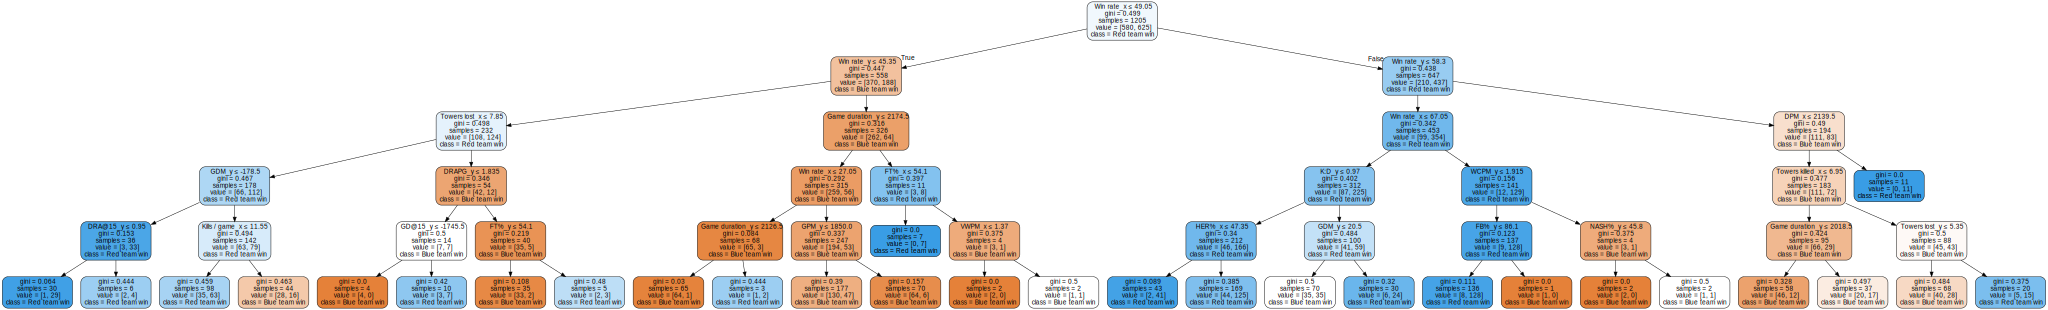

In [251]:
colnames = final.columns
colnames = colnames.drop("Score")

classifier = tree.DecisionTreeClassifier(max_depth=5)
classifier.fit(data, onedLabels)

dot_data = tree.export_graphviz(
    classifier,
    out_file=None,
    feature_names=colnames,
    class_names=['Blue team win','Red team win'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualize the decision tree
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size(5,5)
pydot_graph.write_png('decisionTree.png')
graph = graphviz.Source(dot_data)
graph

Here we can see interesting observations about the most significant factors to determine winner. The biggest determinator is of course **Win rate_x**, blue team's winrate, which cuts the whole dataset into half. After the most self-explanatory factors, winrates, we get to see more interesting observations on depth 3.

There we have some of the most important factors to determine a winner: **Towers lost**, **Game duration** (average of the whole split) and **DPM**. Towers and damage are of course somewhat self-explanatory also. The winning team always destroys more turrets and very often deals more damage. Only after these values we get more in-depth observations at depth 4: **GDM**, **DRA%**, **TD@15**, **K:D** as well as **Wards cleared per minute**.

In the last depth we get to see the more niche classification steps. These are the ones making a decision between a close matchup. There we can see values such as **DRA@15**, **Kills / game**, **HER%**, and **FB%**.

In [252]:
predictions = classifier.predict(test_dataG)

accuracy = accuracy_score(test_labelsG, predictions)
print (f"Accuracy calculated from the test set = {round(accuracy * 100, 2)} %")
print (classification_report(test_labelsG, predictions, target_names=['Blue team win', 'Red team win']))

Accuracy calculated from the test set = 76.35 %
               precision    recall  f1-score   support

Blue team win       0.76      0.79      0.77       123
 Red team win       0.77      0.74      0.75       118

     accuracy                           0.76       241
    macro avg       0.76      0.76      0.76       241
 weighted avg       0.76      0.76      0.76       241



The decision tree also seemed to give good results and be accurate, but with like MultinomialNB I wasn't satisfied with the results it give when I tried predicting with probabilities. The results seemed to be out of touch with reality and seemed overfitting. The model can still be used to observe the variables it uses to for classification.

### 4.4 Linear regression

In [253]:
scaler = StandardScaler()
reg = linear_model.LinearRegression()
reg.fit(train_dataG, train_labelsG)

mostUseful = pd.DataFrame()
mostUseful["Variable"] = colnames
mostUseful["coefficient"] = [round(coef, 2) for coef in reg.coef_]
mostUseful = mostUseful.sort_values('coefficient', ascending = False)
mostUseful.head(10)

,Variable,coefficient
42,K:D_y,0.20
15,K:D_x,0.14
30,DRA@15_y,0.11
23,VWPM_x,0.09
14,HERPG_x,0.07
50,VWPM_y,0.07
3,DRA@15_x,0.05
47,TD@15_y,0.05
0,CSM_x,0.04
32,Deaths / game_y,0.04


In [254]:
mostUseful = mostUseful.sort_values('coefficient', ascending = True)
mostUseful.head(10)

,Variable,coefficient
41,HERPG_y,-0.24
45,NASHPG_y,-0.09
20,TD@15_x,-0.08
18,NASHPG_x,-0.08
51,WCPM_y,-0.08
4,DRAPG_x,-0.04
52,WPM_y,-0.03
24,WCPM_x,-0.02
53,Win rate_y,-0.01
43,Kills / game_y,-0.01


Linear regression gives us somewhat bizarre results. This model says that statistics like red team's **K:D** and **DRA@15** would positively indicate the blue team's win. This of course makes no sense in reality. Let's take a look at the model's metrics:

In [255]:
pred_test_labels = reg.predict(test_dataG)
pred_labels = reg.predict(train_dataG)

mse_test = mean_squared_error(test_labelsG, pred_test_labels)
r2s_test = r2_score(test_labelsG, pred_test_labels) 
print("MSE on test set = ", mse_test)
print("R2s on test set = ", r2s_test)
rmse_test = np.sqrt(mse_test)
print("RMSE on test set = ", rmse_test)

mse_train = mean_squared_error(train_labelsG, pred_labels)
rmse_train = np.sqrt(mse_train)
print("RMSE on train set = ", rmse_train)

MSE on test set =  0.18768533497812284
R2s on test set =  0.24893537681794464
RMSE on test set =  0.43322665543353034
RMSE on train set =  0.4261127596888486


We can see that the R-squared value is extremely low. It should be around 0.7 to indicate good fitting of a linear model. So these results cannot be taken as valid points.

### 4.5 TensorFlow Keras Sequential

With the neural network I decided to go for a simple model. It has only one hidden layer with 24 neurons and one <code>Dropout</code> layer with a small rate of 0.1 to prevent overfitting. For the <code>BATCH_SIZE</code> I chose 16, which seemed to give me the best results with my relatively small data set of 1205 games. I run 500 <code>EPOCHS</code>, which takes only around 35 seconds.

In [256]:
def makeModel():    
    model = models.Sequential([
        layers.Dense(24, activation = "relu", input_shape = (54,)),
        layers.Dropout(0.1),
        layers.Dense(2, activation = "sigmoid", name = "softmax")
    ])
    
    model.compile(
        optimizer = optimizers.RMSprop(),
        loss = losses.BinaryCrossentropy(),
        metrics = [
            metrics.BinaryAccuracy(name = 'acc'),
            metrics.Recall(name = 'recall'), 
        ]
    )
    
    return model

model = makeModel()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 24)                1320      
                                                                 
 dropout_9 (Dropout)         (None, 24)                0         
                                                                 
 softmax (Dense)             (None, 2)                 50        
                                                                 
Total params: 1,370
Trainable params: 1,370
Non-trainable params: 0
_________________________________________________________________


In [257]:
EPOCHS = 500
BATCH_SIZE = 16

t0 = time.time()
history = model.fit(
    train_data,
    train_labels,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (validation_data, validation_labels),
    verbose = 0
)
t1 = time.time()
etime = t1 - t0
print(f'Total elapsed time {etime:.2f} s and {etime / EPOCHS:.3f} s/epoch')

Total elapsed time 33.01 s and 0.066 s/epoch


## 5. Validation and overfitting

To see how well the model performed and to ensure that no overfitting is happening we check the validation metrics. Here we see that the validation results are quite close to the training results, this is good since too much difference between these results means that something may have gone wrong.

In [258]:
print(f"Accuracy: {round(history.history['acc'][-1], 2) * 100:.2f} % \t\t Val Accuracy: {round(history.history['val_acc'][-1], 2) * 100:.2f} %")
print(f"Recall: {round(history.history['recall'][-1], 2) * 100:.2f} % \t\t Val Recall: {round(history.history['val_recall'][-1], 2) * 100:.2f} %")

Accuracy: 70.00 % 		 Val Accuracy: 72.00 %
Recall: 70.00 % 		 Val Recall: 72.00 %


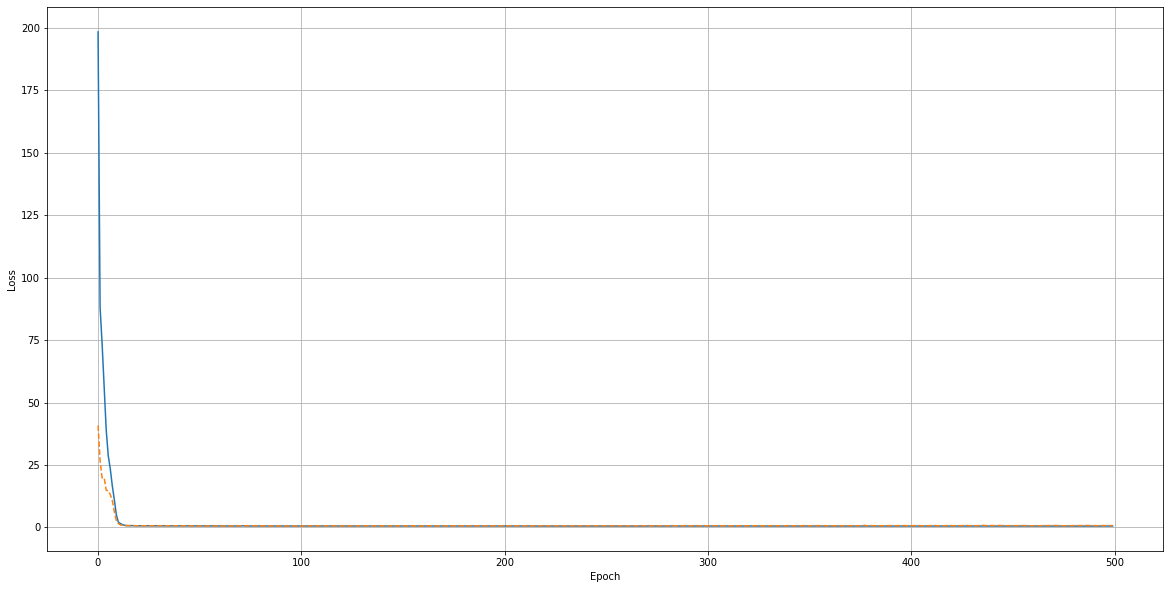

In [259]:
def plot_loss(history):
    plt.plot(history.epoch, history.history['loss'])
    plt.plot(history.epoch, history.history['val_loss'], linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()

plot_loss(history)

From the loss plot we can also see that the validation curve stays under the training curve and has a similar curvature to the training curve. If the validation curve would've gone above the training curve, it would be an indication of possible overfitting. This model seems not to be overfitting. The chance of overfitting is lowered a lot by the dropout layer in our model and the normalized input layer.

## 6. Performance and evaluation

In this section we are displaying the loss, accuracy and recall values on each epoch with plots for both training and validation.

### 6.1 Evaluating plots in training and validation

Validating the model outputs are important to ensure the model's reliability. The main aim of validating the model in the last section is that it provides an opportunity for us to improve the settings. In this section we look at all the metrics more in-depth, since in the training section we looked only at the loss plot to determine is the model overfitting.

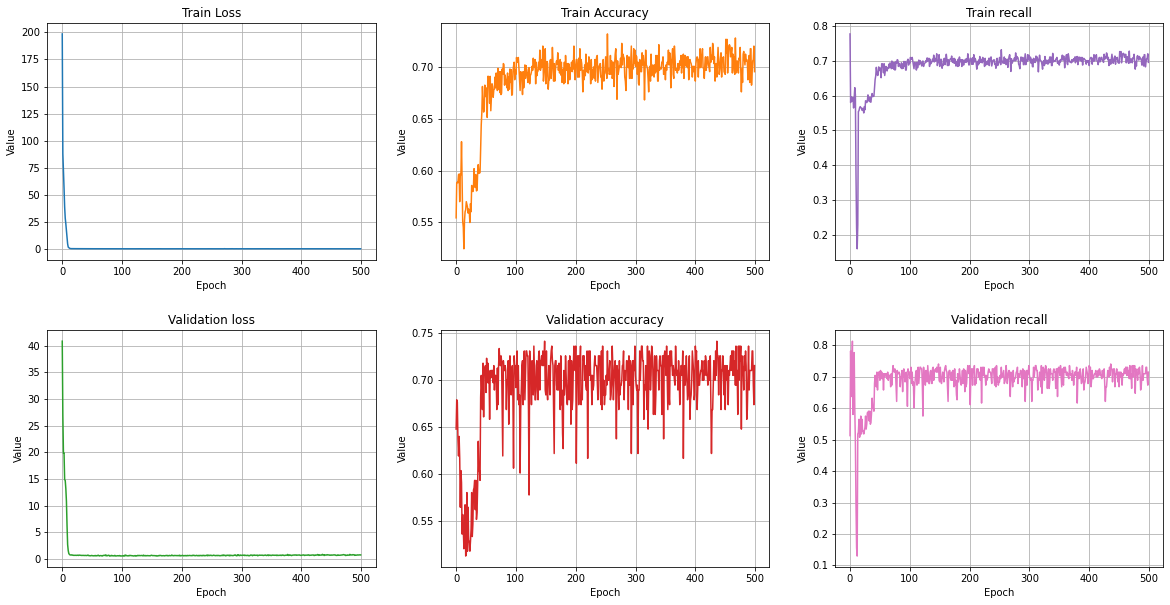

In [260]:
epochs = history.epoch
loss = history.history['loss']
acc = history.history['acc']
recall = history.history['recall']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
val_recall = history.history['val_recall']

# Plot all of the metrics
fig, axs = plt.subplots(2, 3)
fig.subplots_adjust(hspace=0.3, wspace=0.2)
axs[0, 0].plot(epochs, loss)
axs[0, 0].set_title('Train Loss')
axs[0, 0].grid()
axs[0, 1].plot(epochs, acc, 'tab:orange')
axs[0, 1].set_title('Train Accuracy')
axs[0, 1].grid()
axs[0, 2].plot(epochs, recall, 'tab:purple')
axs[0, 2].set_title('Train recall')
axs[0, 2].grid()
axs[1, 0].plot(epochs, val_loss, 'tab:green')
axs[1, 0].set_title('Validation loss')
axs[1, 0].grid()
axs[1, 1].plot(epochs, val_acc, 'tab:red')
axs[1, 1].set_title('Validation accuracy')
axs[1, 1].grid()
axs[1, 2].plot(epochs, val_recall, 'tab:pink')
axs[1, 2].set_title('Validation recall')
axs[1, 2].grid()

for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Value')

In [261]:
# Evaluate the trained model with test dataset
test_loss, test_accuracy, test_recall = model.evaluate(test_data, test_labels, verbose = 0)
print(f'Test loss = {test_loss:.3f}')
print(f'Test accuracy = {test_accuracy:.3f}')
print(f'Test recall = {test_recall:.3f}')

Test loss = 0.555
Test accuracy = 0.732
Test recall = 0.734


## 7. Conclusion

With the <code>Keras Sequential</code> model we get a respectable accuracy and recall of 70% on both the validation and training set. We also achieve the same kind of numbers with the test set (seen in section 7), with a very small loss value and avoiding overfitting. I was also happy with the results of the custom predictions I ran with it, as it clearly favors the stronger teams as it should. This model will be the one we will use in the demo section.

The model's 70% accuracy is around the same what an average active watcher and professional analysts get, based on [IWDominate's](https://www.twitch.tv/iwilldominate) and his viewers predictions.

## 8. Predict games demo

This is a demo for the prediction system. It takes each team's current strenght from [gol.gg](https://gol.gg/esports/home/) and predicts the probablities of a win with the <code>Keras Sequential</code> model.

In [262]:
model.save("predictor")

INFO:tensorflow:Assets written to: predictor\assets


In [263]:
def get_sec(time_str):
    m, s = time_str.split(':')
    return float(60 * int(m) + int(s))

def predict(team1, team2, region):
    predictingModel = model
    url=''
    if region == "LEC":
        url = 'https://gol.gg/teams/list/season-ALL/split-ALL/tournament-LEC%20Spring%202022/'
    if region == "LCS":
        url = 'https://gol.gg/teams/list/season-ALL/split-ALL/tournament-LCS%20Spring%202022/'
    if region == "LCK":
        url = 'https://gol.gg/teams/list/season-ALL/split-ALL/tournament-LCK%20Spring%202022/'

    data = pd.read_html(requests.get(url, headers={'User-agent': 'your bot 0.1'}).text)[1]

    data["FT%"] = data["FT%"].replace('-', float(0)).astype(float)
    data["Win rate"] = data["Win rate"].apply(lambda x: float(x.replace("%", "")))
    data["Game duration"] = data["Game duration"].apply(lambda x: get_sec(x))
    data["FB%"] = data["FB%"].replace('-', float(0)).astype(float)
    data["Season"] = data["Season"].apply(lambda x: str(x).replace('S', '')).astype(float)
    data = data.reindex(sorted(data.columns), axis=1)

    teamOne = data[data["Name"] == team1]
    teamTwo = data[data["Name"] == team2]

    predictionsData = pd.merge(teamOne, teamTwo, left_on="Region", right_on="Region")
    predictionsData = predictionsData.drop(columns=['Name_x', 'Name_y', 'Region'])
    predictionsData = predictionsData.astype(float)

    predictions = predictingModel.predict(predictionsData)
    team1Result = predictions[0][0]
    team2Result = predictions[0][1]

    if (team1Result > team2Result):
        print(f"{team1Result * 100:.2f}% {team1} - {team2Result * 100:.2f}% {team2}\n")
    else:
        print(f"{team2Result * 100:.2f}% {team2} - {team1Result * 100:.2f}% {team1}\n")

In [264]:
predict("Astralis", "G2 Esports", "LEC")
predict("Team BDS", "Excel Esports", "LEC")
predict("MAD Lions", "SK Gaming", "LEC")
predict("Rogue", "Misfits Gaming", "LEC")
predict("G2 Esports", "Astralis", "LEC")
predict("Team Vitality", "Fnatic", "LEC")

80.06% G2 Esports - 19.94% Astralis

67.34% Excel Esports - 32.66% Team BDS

62.11% MAD Lions - 37.89% SK Gaming

62.22% Rogue - 37.78% Misfits Gaming

73.06% G2 Esports - 26.94% Astralis

68.41% Fnatic - 31.59% Team Vitality

